# Wine clustering using KNN
This example uses KNN in order to clustering the Wine data set and then predict the origin of the wine based on 13 constituents found in each of the three types of wines. 
## Import necessary libs

In [1]:
import numpy as np  
import matplotlib.pyplot as plt  

## Load the Dataset

In [2]:
from sklearn import datasets

wine = datasets.load_wine()

X = wine.data[:, :]
y = wine.target

## Display some features relationship graphs

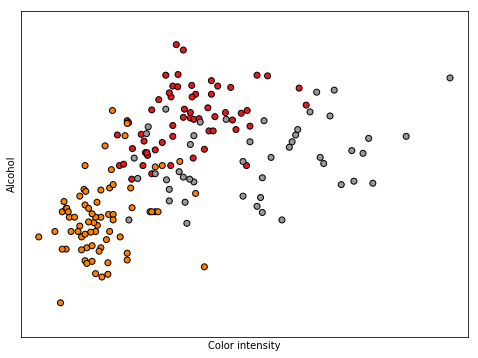

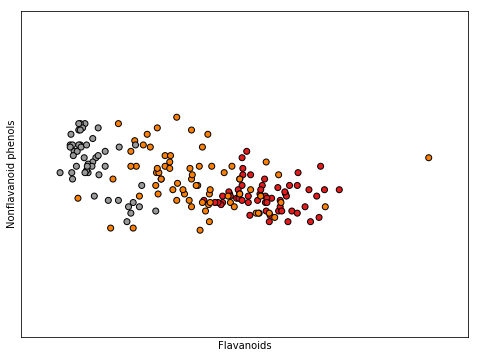

In [3]:
import matplotlib.pyplot as plt

plt.figure(1, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 9], X[:, 0], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Color intensity')
plt.ylabel('Alcohol')

x_min, x_max = X[:, 9].min() - .5, X[:, 9].max() + .5
y_min, y_max = X[:, 0].min() - .5, X[:, 0].max() + .5
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.figure(2, figsize=(8, 6))
plt.scatter(X[:, 6], X[:, 7], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Flavanoids')
plt.ylabel('Nonflavanoid phenols')

x_min, x_max = X[:, 6].min() - .5, X[:, 6].max() + .5
y_min, y_max = X[:, 7].min() - .5, X[:, 7].max() + .5
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()

## Split the Dataset
Split the dataset into 80% trainning and 20% test examples

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Pre-process the dataset
In order to have a normalized base

In [5]:
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

## Create the KNN Classifier
And predict the class of test base

In [6]:
from sklearn.neighbors import KNeighborsClassifier  

knn = KNeighborsClassifier(weights='distance', n_neighbors=17)  
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test)

## Evaluate the results
Plot the confusion matrix and the classification report (precision, recall, f1-score and the support)

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

[[12  0  0]
 [ 0 13  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



## Acknowledgements
- [UCI Wine Data Set](https://archive.ics.uci.edu/ml/datasets/Wine)